# Objective : Multivariate Regression Analysis

### To perform multivariate regression on the 50 start ups dataset using the step by step method.


In [1]:
#Importing Libreary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 1 : Load the Data

In [2]:
#Load the data
data = pd.read_csv('50_Startups.csv')

# Perform basic EDA (Exploratory Data Analysis)

In [3]:
# Their is no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
# Check the 1st 5 couloumn
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Identify inter feature relationship using visualization

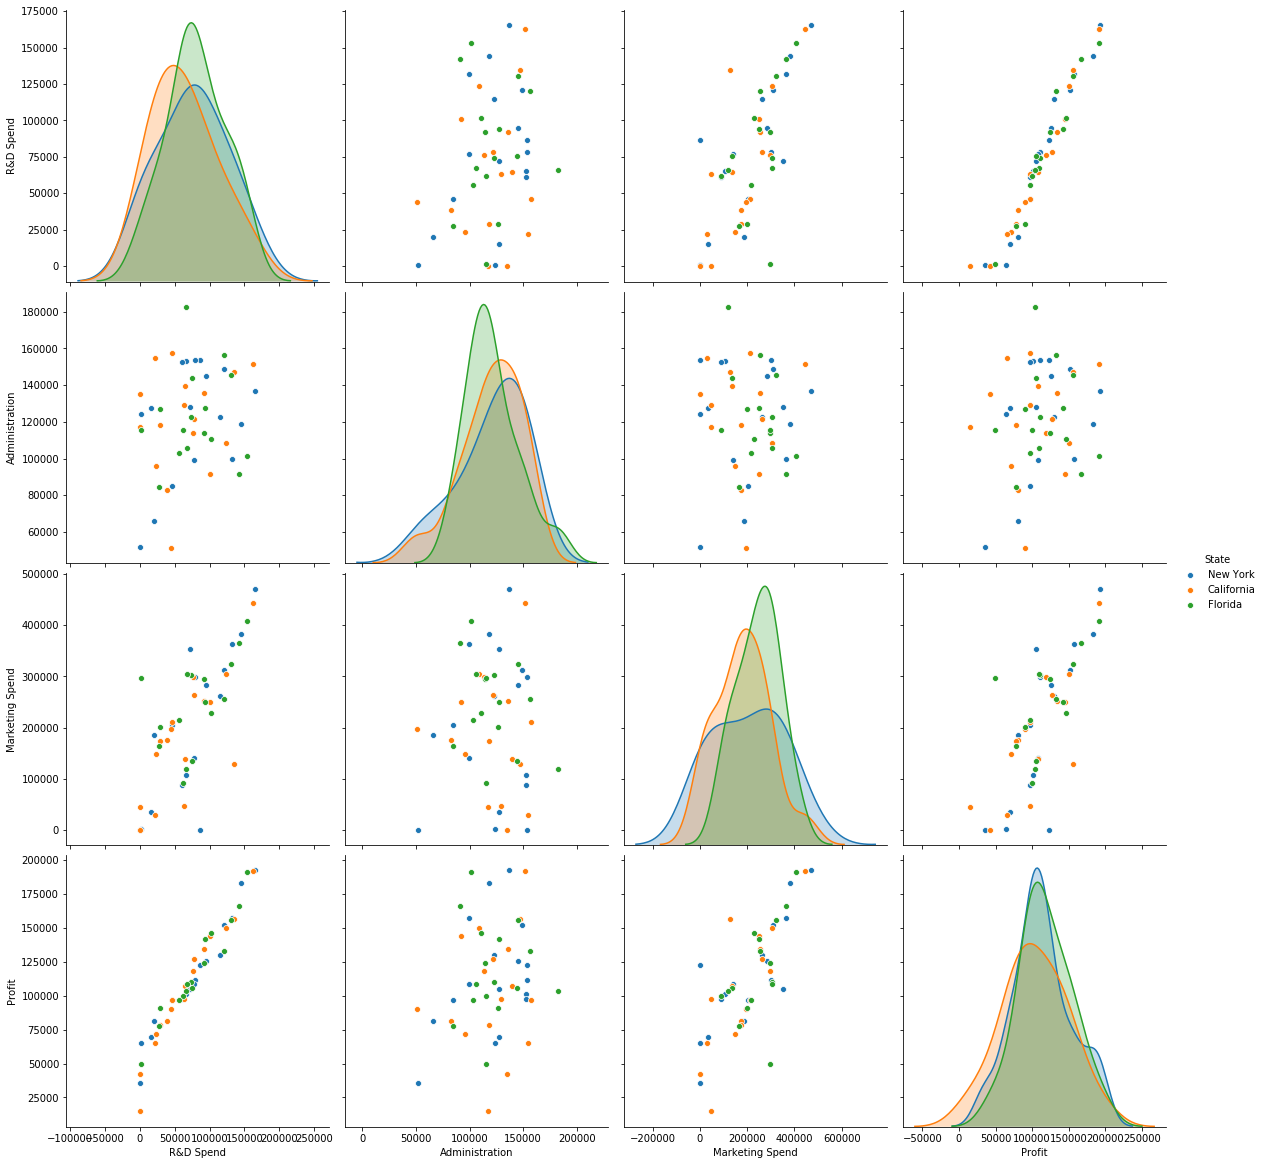

In [5]:
sns.pairplot(data,  diag_kind='kde',height=4,hue='State')

In [6]:
#Remove space from the coulmn
data.columns =data.columns.str.replace(' ','_')
data.columns =data.columns.str.replace('&','_and_')

## Step 2 : Obtain the Info of the dataframe data:

In [7]:
# Checking missing value
# As their is no missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_and_D_Spend    50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
# Checking Corellation
corelation = data.corr()
corelation

,R_and_D_Spend,Administration,Marketing_Spend,Profit
R_and_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
## Inferences from corelations:

 # The relation between profit and R&D spend it very high.
 # The relation between Makreting spend and R&D spend is also high
 # The relation between Marketing spend and profit also very high


## Step 3: Outlier Detection and handling 

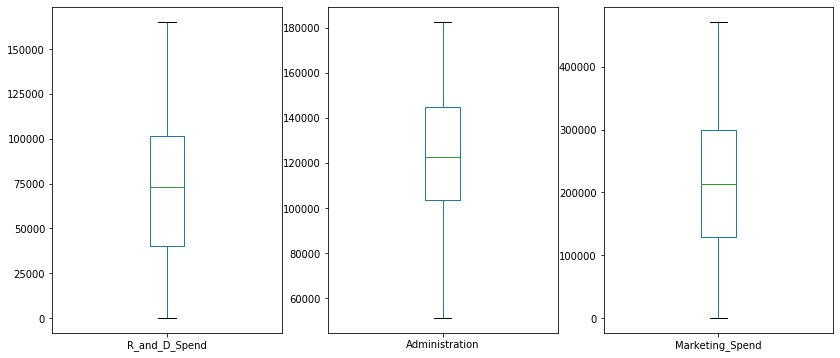

In [10]:
# Droping the Categorical data
#Outlier Detection and handling

data1 = data.drop(columns=['Profit','State'],axis=1)
data1.plot(kind='box', figsize= (14,6),subplots=True, layout=(1,3))
plt.show()

#So as we can see their is no outlier

In [11]:
# As we found their is no outlier

### Step 4 : Handle Inappropriate Data

In [12]:
# As their is no inappropriate data 

## Step 5 : Check and Handle missing data

In [13]:
# Check and handel missing data
# As their is no missing data 
data1.isna().sum()

R_and_D_Spend      0
Administration     0
Marketing_Spend    0
dtype: int64

## Step 6 : Check and handle Categorical Data

In [14]:
# Feature State is Categorical
data.State.nunique()
# Inference : 3 Unique values

3

In [15]:
# Handel the categorical data State coulumn
# Handel State coulomn by converting it to dummies

dataUpdated = pd.get_dummies(data, columns=['State'],prefix = None)
dataUpdated.head()

,R_and_D_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### Step 7 : Check and Handle Ordinal Data - There is no ordinal Data
### Step 8 : Check and Handle Pure String data - not present

### Step 9 : Split the data into features and label

In [31]:
# Creating X featutes and check the shape
X = dataUpdated.drop('Profit', axis = 1).values
X.shape

(50, 6)

In [32]:
#Creating Y label and Checking the shape
y = dataUpdated.Profit.values
y.shape # y is one d so we have to convert it to 2d

(50,)

In [18]:
# convert y to 2d
y = y.reshape(-1,1)

### Splitting the featues into Train and Test datasets :

In [19]:
## Splitting the data into train and test datasets at 80:20 ratio with random state of 51 :

   
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state = 51)
     

In [20]:
#For Loop Trick for best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state = i)
    
    Model = LinearRegression()
    Model.fit(X_train,y_train)
    
    train_score= Model.score(X_train,y_train)
    test_score= Model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Random State: {} , Test Score: {}, Train Score: {}".format(i,test_score,train_score))

Random State: 1 , Test Score: 0.9649618042060305, Train Score: 0.9424465426893971
Random State: 2 , Test Score: 0.9783259006629259, Train Score: 0.9398417195515446
Random State: 4 , Test Score: 0.9560357304860205, Train Score: 0.9473848999820091
Random State: 5 , Test Score: 0.9669763022156828, Train Score: 0.9438505226429931
Random State: 10 , Test Score: 0.9901105113396006, Train Score: 0.9385918220043519
Random State: 14 , Test Score: 0.9726607102793996, Train Score: 0.9411603359254432
Random State: 21 , Test Score: 0.9633877651304174, Train Score: 0.946138584319559
Random State: 22 , Test Score: 0.9757906394981232, Train Score: 0.9425908513252554
Random State: 24 , Test Score: 0.9687727807395062, Train Score: 0.9464972114069966
Random State: 26 , Test Score: 0.9602561948868193, Train Score: 0.9454518446256155
Random State: 29 , Test Score: 0.9500997612789298, Train Score: 0.9482961316721963
Random State: 31 , Test Score: 0.9539450076684193, Train Score: 0.9435367947390881
Random St

### Step 10 : Feature Scaling 

In [21]:
#Standardize the data using Standard Scaler
from sklearn.preprocessing import StandardScaler

standardScaler =StandardScaler()

standardScaler.fit_transform(X_train) 
standardScaler.transform(X_test) 

array([[ 0.02991304,  0.07704849,  0.38971359,  1.52752523, -0.69388867,
        -0.77459667],
       [-0.27117815,  0.3642743 , -1.33618563,  1.52752523, -0.69388867,
        -0.77459667],
       [ 0.31811943,  0.60075552,  0.29734495,  1.52752523, -0.69388867,
        -0.77459667],
       [ 0.49706338, -1.04618099,  0.27425202,  1.52752523, -0.69388867,
        -0.77459667],
       [-0.21669527,  2.37755046, -0.76634724, -0.65465367,  1.44115338,
        -0.77459667],
       [-0.05293613,  0.12171096,  0.6978945 , -0.65465367,  1.44115338,
        -0.77459667],
       [-1.16139149, -2.02002331, -0.23561978, -0.65465367, -0.69388867,
         1.29099445],
       [-0.98750687,  0.28274984, -0.11019309, -0.65465367,  1.44115338,
        -0.77459667],
       [ 0.03767234,  1.28954789,  0.66957004, -0.65465367, -0.69388867,
         1.29099445],
       [-1.12122709,  1.328464  , -1.47654809,  1.52752523, -0.69388867,
        -0.77459667]])

## Multivariate Regression - Linear Regression  with all independent Variables :

In [33]:
# Create Statistical Model by using all independent variable
#Build Model
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#Check the Quality of the Model using Accuracy Score
print(lrmodel.score(X_train,y_train))
print(lrmodel.score(X_test,y_test))

0.9570032465887534
0.8397687560209903


In [36]:
## Getting the y intercept :

intercept = lrmodel.intercept_
intercept

array([46694.326377])

In [38]:
#3 Getting the coefficients for the independent variables

coefs = lrmodel.coef_

In [39]:
coefs

array([[ 8.20134955e-01, -9.12273850e-03,  2.30086199e-02,
        -8.76430272e+02,  4.00848671e+02,  4.75581601e+02]])

In [24]:
## Predicting the Profit value on the test data

lr_pred = lrmodel.predict(X_test)
lr_pred

array([[114772.10993348],
       [ 97703.23993585],
       [125841.45598559],
       [133291.38518326],
       [102318.53477474],
       [113639.54282932],
       [ 67421.97041228],
       [ 74071.87654348],
       [116953.55901828],
       [ 63246.32277062]])

In [25]:
from sklearn import metrics

# Compute Root Mean Squared Error (RMSE) from Linear Regression

RMSE1 = np.sqrt(metrics.mean_squared_error(y_test,lr_pred))

print('RMSE for Linear Regression is {}'.format(RMSE1))


## RMSE for Linear Regression is 8662.027516443119

RMSE for Linear Regression is 9252.91718025374


In [26]:
## Internal check for accuracy :

mean_profit = dataUpdated.Profit.mean()

error = round((RMSE1/mean_profit)*100,2 )

print ('ThE RMSE is {} % of the mean Profit Value'.format(error))

# ThE RMSE is 7.6 % of the mean Profit Value

ThE RMSE is 8.26 % of the mean Profit Value


# Multvariate Regression with Marketing Spend and R & D Spend 

In [27]:
# As at co relation metrix we found that marketing and R&D spend has Strong Corelation 

X_train_New1 = X_train[:,[0,2]]
X_test_New1 = X_test[:,[0,2]]

In [28]:
X_train_New1.shape  ## Checking the shape 

(40, 2)

In [29]:
# Training the model:

lrmodel2 = LinearRegression()
lrmodel2.fit(X_train_New1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
#  Quick initial test :

train_score2 = lrmodel2.score(X_train_New1,y_train)
test_score2 = lrmodel2.score(X_test_New1,y_test)
    
print(" Test Score: {}, Train Score: {}".format(test_score2,train_score2))


 Test Score: 0.8441492668168257, Train Score: 0.9567820503635849


In [41]:
## Predicting values of y - Profit on the test data:

lr_pred_Updated = lrmodel2.predict(X_test_New1)
lr_pred_Updated

array([[115743.98144022],
       [ 98609.46371565],
       [126928.28534016],
       [133974.94120912],
       [102480.18117198],
       [113371.14691428],
       [ 66501.49915992],
       [ 73791.14415524],
       [116889.49011591],
       [ 64387.42571235]])

In [42]:
# Calculate and Print root mean squared error (RMSE) from Linear Regression

RMSE2 = np.sqrt(metrics.mean_squared_error(y_test,lr_pred_Updated))

print('RMSE for Linear Regression with 2 features is {}'.format(RMSE2))

## RMSE for Linear Regression with 2 features is 9125.559426504336 -- 

RMSE for Linear Regression with 2 features is 9125.559426504336


## Linear Regression with one variable - R&D Spend 

In [43]:
## Extracting the column and reshaping into 2 D array:

X_train3 = X_train[:,0].reshape(-1,1)
X_test3 = X_test[:,0].reshape(-1,1)

# Training the model :
    
lrModel3 = LinearRegression()
lrModel3.fit(X_train3,y_train)

# testing the model:

train_score3 = lrModel3.score(X_train3,y_train)
test_score3 = lrModel3.score(X_test3,y_test)
    
print(" Test Score: {}, Train Score: {}".format(test_score2,train_score2))



 Test Score: 0.8441492668168257, Train Score: 0.9567820503635849


In [44]:
## Predicting the y values :

lr_pred3 = lrModel3.predict(X_test3)
lr_pred3


array([[114645.06130597],
       [102001.91675014],
       [126747.15883419],
       [134261.20838774],
       [104289.7119051 ],
       [111166.13506499],
       [ 64620.89736021],
       [ 71922.50001139],
       [114970.88248029],
       [ 66307.44354139]])

In [45]:
# Calculate and Print root mean squared error (RMSE)

RMSE3 = np.sqrt(metrics.mean_squared_error(y_test,lr_pred3))

print('RMSE for Linear Regression is {}'.format(RMSE3))
#RMSE for Linear Regression is 9876.883945771324

RMSE for Linear Regression is 9876.883945771324


### Linear Regression with one variable - Marketing  Spend

In [46]:
## Extracting the column and reshaping into 2 D array:

X_train4 = X_train[:,2].reshape(-1,1)
X_test4 = X_test[:,2].reshape(-1,1)
# Training the model :

lrModel4 = LinearRegression()
lrModel4.fit(X_train4,y_train)

# testing the model:
train_score4 = lrModel4.score(X_train4,y_train)
test_score4 = lrModel4.score(X_test4,y_test)
    
print(" Test Score: {}, Train Score: {}".format(test_score4,train_score4))

# Test Score: 0.2908478973223332, Train Score: 0.574969087582023

 Test Score: 0.2908478973223332, Train Score: 0.574969087582023


In [47]:
# Creating a dataframe of all the RMSE values calculated


data_RMSE = [[ RMSE1,'Multivariate Reg - all vars'], [RMSE2 ,'Multivariate  Reg - 2 vars'], [RMSE3,'Lin reg - Single Var -R&D']] 

dataFrame_RMSE = pd.DataFrame(data_RMSE, columns = [ ' RMSE ', 'Type of Regression',]) 
dataFrame_RMSE





,RMSE,Type of Regression
0,9252.917180,Multivariate Reg - all vars
1,9125.559427,Multivariate Reg - 2 vars
2,9876.883946,Lin reg - Single Var -R&D


# Model Deployment

In [48]:
#Deploy The Model for 2 features :

# 1. Pre-deployment Test
# 2. Deployment of model in a persistant file

In [50]:
# 1. Pre-deployment Test

inputRandDSpend = float(input("Enter R & D Spend Amount as a float variable : "))
inputMarketingSpend  =  float(input("Enter Marketing Spend Amount as a float variable: "))

predictedProfit = lrmodel2.predict(np.array([[inputRandDSpend,inputMarketingSpend]]))
print("The Profit for {} - R & D Spending and  {} - Marketing Spending is  : {}".format(inputRandDSpend,inputMarketingSpend,predictedProfit))

Enter R & D Spend Amount as a float variable : 50000
Enter Marketing Spend Amount as a float variable: 2000
The Profit for 50000.0 - R & D Spending and  2000.0 - Marketing Spending is  : [[86573.99642875]]


In [ ]:
pickle.dump(lrModel2 , open('ProfitPredictor.ibn','wb')) 
#Get the memory object and store it in a persistent file